In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [55]:
df = pd.read_csv('./data/UCI_results_after_update.csv')
df.dropna(inplace=True)
df

,Graph,seeds,our_mean,our_median,our_std,hein_mean,hein_std
0,zoo,20,28.514851,27.227723,10.062489,2.3,1.9
1,zoo,25,23.168317,21.782178,8.596077,1.5,2.4
2,zoo,30,19.801980,19.801980,5.048534,2.9,2.3
3,zoo,35,14.059406,14.356436,4.323306,0.9,1.4
4,zoo,40,10.396040,11.881188,4.555173,0.8,1.7
5,zoo,45,8.613861,6.930693,4.502260,1.2,1.8
6,zoo,50,7.524752,5.940594,3.965893,1.6,2.9
7,mushroom,20,14.468242,12.364599,5.899543,18.4,7.4
8,mushroom,40,9.292221,8.801083,2.469451,9.8,4.5
9,mushroom,60,6.649434,6.413097,1.618179,9.9,5.5


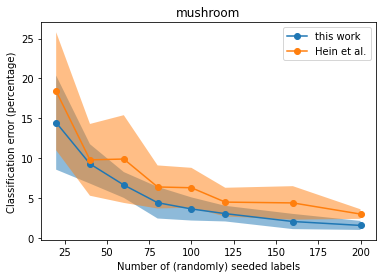

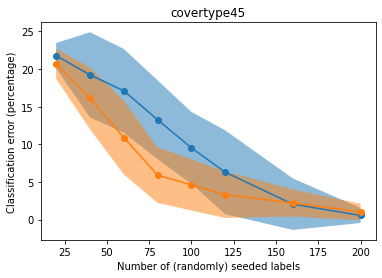

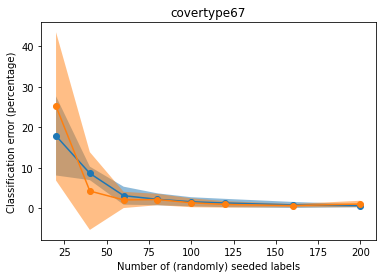

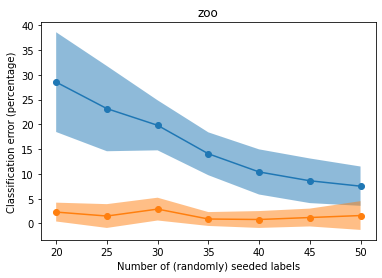

In [57]:
graph_name = 'mushroom'
for idx,graph_name in enumerate(['mushroom','covertype45','covertype67','zoo']):
    graph_df = df.loc[df['Graph'] == graph_name]

    # graph data has value as columns, not rows
    graph_data = graph_df[['seeds','our_mean','our_std','hein_mean','hein_std']].to_numpy()
    seeds = graph_data[:,0]
    plt.figure()
    for mean_idx, std_idx, label in [(1,2,'this work'),(3,4,'Hein et al.')]:
        plt.plot(seeds, graph_data[:,mean_idx],'-o', label=label)
        plt.fill_between(seeds, 
                         graph_data[:,mean_idx]-graph_data[:,std_idx],
                         graph_data[:,mean_idx]+graph_data[:,std_idx],
                        alpha=0.5)
    if idx==0:
        plt.legend()
    plt.ylabel('Classification error (percentage)')
    plt.xlabel('Number of (randomly) seeded labels')
    plt.title(graph_name)
    plt.show()


